<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [2]:
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

#### **Задание 0**
Для чего фиксируем сиды в домашках?

**Ответ.** Для воспроизводимости результатов. Многие алгоритмы, связанные с анализом данных, включают в себя генерирование псевдослучайных чисел. Например, алгоритм разделения выборки на трейн и тест (по которым как минимум подбираются веса и вычисляются значения метрик -- на слегка отличающихся выборках метрики и веса будут слегка отличаться). Генераторы псевдослучайных чисел обычно начинают с какого-то начального значения, по которому генерируются все остальные элементы последовательности. Это начальное значение и называется seed. Поскольку seed определяет всю последовательность псевдослучайных чисел, фиксируя его, мы фиксируем все дальнейшие результаты работы алгоритмов: у нас будут одни и те же значения в трейне и тесте, одни и те же веса у моделей и так далее.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

**Решение.**

При реальном применении модели все преобразования мы делаем, исходя из того, как устроен трейн, так как тест нам обычно не доступен. К примеру, мы можем обучаться на исторических данных, а будущие данные предобрабатывать, исходя из того, что формат колонок не меняется по сравнению с трейном. Поэтому все преобразования будем делать над `df_train`.

Проверим наличие пропусков встроенной функцией. Для колонок `mileage`, `engine`, `max_power`, `torque`, `seats` есть пропуски.

In [4]:
df_train.isna().any()[df_train.isna().any()]

mileage      True
engine       True
max_power    True
torque       True
seats        True
dtype: bool

Наличие дубликатов тоже проверим встроенной функцией. Видим, что дубликаты есть:

In [5]:
df_train.duplicated().any()

True

Посмотрим на подтаблицу нашего датафрейма, которая содержит все дублируемые строчки, явные дубликаты точно есть:

In [6]:
df_train[df_train.duplicated(keep=False)].sort_values(df_train.columns.tolist())

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
5637  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5991  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
6778  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

       max_power               torque  seats  
1703  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
1836   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
117      188 bhp  400nm@ 1750-3000rpm    5.0  
...          ...                  ...    ...  
5637     190 bhp                400Nm    5.0  
5652     190 bhp                400Nm    5.0  
5753     190 bhp                400Nm    5.0  
5991     190 bhp                400Nm    5.0  
6778     190 bhp                400Nm    5.0  

[1478 rows x 13 columns]

Строим дашборд:

In [7]:
profile = ProfileReport(df_train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Видим, что:
- Процент дубликатов не очень большой, после их удаления все равно останется больше 90% от исходных данных, что поможет модели обучаться лучше. Это значит, что данных для обучения будет много и их при этом можно сделать более разнообразными, удалив дубликаты, чтобы модель не "подгонялась" под дублированные значения.
- Среди переменных есть не только числовые, но и категориальные и даже текстовые. Необходимо будет преобразовывать текстовые в категориальные или числовые, а для категориальных подбирать способ их кодирования в числовые. При этом при анализе облаков слов для текстовых фичей закрадывается сомнение, что структура у них простая -- к примеру, по `mileage` видно, что в основном там встречаются числа + какие-то аббревиатуры, видимо, это единицы измерения, которые надо будет просто удалить, чтобы получить числовую фичу. В колонке же `name` только ~30% значений уникальны -- опять же, для действительно неструктурированного текста выглядит странно. Скорее всего, это просто замусоренная лишней информацией категориальная фича.
- В разделе Correlations видим, что колонка `km_driven` сильно скоррелированна с `year`, а `transmission` -- c `selling_price`. Можно исклбчить, к примеру, `km_driven`, чтобы избежать проблемы мултиколлинеарности. При этом таргет линейно скоррелирован с `transmission`, что уже говорит о том, что хотя бы какое-то предсказание мы построить сможем. При этом видим по матрице корреляций, что линейных корреляций с таргетом среди дугих фичей особо не наблюдается. Есть два варианта: либо зависимость таргета от фичей очень слабая, либо она нелинейная. 
- Распределение `selling_price`, `km_driven`, `seats` выглядит очень скошенным, возможно, потребуется логарифмировать данные фичи, чтобы перевести их в новую шкалу. 
- Видим, что во всех колонках очень мало пропущенных значений. Значит, есть высокие шансы, что модель получится более-менее нормальной, так как в данных большая часть значений будут не "синтетическими". Если бы пропусков было много, то мы бы обучались зависимости таргета от, например, медианы, когда реальное значение не было равно медиане -- то есть, обучаемся не той зависимости, которая реально существует.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Решение.**

Посмотрим на метрики для трейна:

In [8]:
df_train.describe(include=np.number)

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Сравнение медианы и средней:
- `year`: средний год 2013, а медианный -- 2015. Медиана и средняя похожи, по `df_train.year.value_counts()` видно, что 2013 встречается чуть меньше 600 раз, а 2015 -- чуть больше 650, так что делаем вывод, что типичный автомобиль в выборке был выпущен где-то в середине 2010-х. Средняя ниже медианы, скорее всего, из-за того, что в выборке есть пара автомобилей годом выпуска меньше 2000-го года, которые сильно скашивают среднее. Если посмотреть на `df_train.year.value_counts()`, мы как раз это и увидим.
- `selling_price`: среднее значение $6 \cdot 10^5$, а медианное -- $4,5 \cdot 10^5$. Делаем вывод: средний автомобиль стоит в районе 500,000, но при этом есть несколько "выбросов" с очень высокой ценой.
- `km_driven`: аналогичная история, средняя чуть выше медианы. Делаем вывод, что типичный автомобиль имеет пробег в районе 60000 км, но есть несколько автомобилей с очень большим пробегом.
- Для `seats` средняя и медиана практически равны

Делаем вывод, что типичный автомобиль был выпущен в середине 2010-х, стоит чуть меньше 500000 и имеет пробег около 60000 км. Но в выборке есть выбросы: несколько автомобилей с очень большой ценой, с очень большим пробегом или очень старые.

In [9]:
df_train.describe(exclude=np.number)

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

Теперь для теста:

In [10]:
df_test.describe(include=np.number)

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

На тесте видим практически идентичную ситуацию с трейном.

In [11]:
df_test.describe(exclude=np.number)

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

Сравним средние и медианы:

In [12]:
pd.DataFrame(
    pd.concat(
        [
            df_train.select_dtypes(np.number).mean(), 
            df_test.select_dtypes(np.number).mean(),
            df_train.select_dtypes(np.number).median(),
            df_test.select_dtypes(np.number).median()
        ], 
        axis=1
    ).values,
    columns=['train_mean', 'test_mean', 'train_median', 'test_median'],
    index=['year', 'selling_price', 'km_driven', 'seats']
)

train_mean      test_mean  train_median  test_median
year             2013.818403    2013.681000        2015.0       2014.0
selling_price  639515.197171  617901.042000      450000.0     434999.0
km_driven       69584.615517   71393.341000       60000.0      61500.0
seats               5.419008       5.410805           5.0          5.0

Видим, что средние и медианы почти для всех колонок отклоняются будто бы в рамках погрешности. Единственное, что вызывает сомнение, -- это различие в медианах колонки `year`, будто в `train` и `test` машины берутся немного разного года выпуска. Проверим дополнительно, все ли нормально.

Text(0.5, 1.0, 'Гистограмма для year, test')

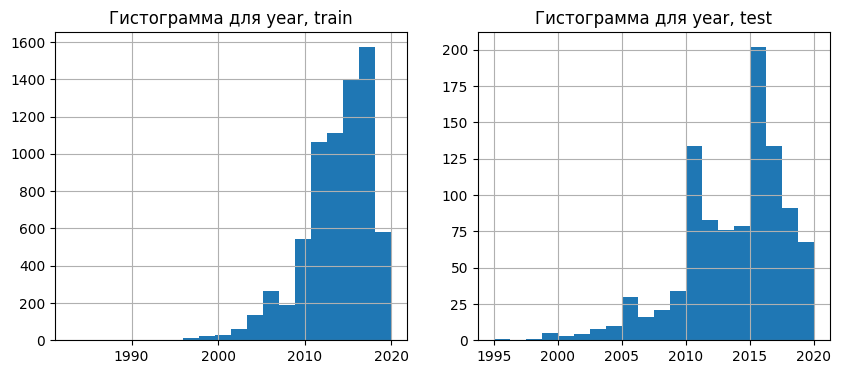

In [13]:
%matplotlib inline 

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

df_train.year.hist(ax=axs[0], bins=20)
df_test.year.hist(ax=axs[1], bins=20)

axs[0].set_title('Гистограмма для year, train')
axs[1].set_title('Гистограмма для year, test')

Видим, что гистограммы как-то подозрительно отличаются начиная с 2010, хотя до этого бины выглядят практически одинаково. Проверим на всякий случай, что все нормально стандартным непараметрическим тестом:

In [14]:
%%time

from scipy.stats import mannwhitneyu

_, p = mannwhitneyu(df_train.year, df_test.year)
p

CPU times: user 6.82 ms, sys: 1.61 ms, total: 8.42 ms
Wall time: 2.95 ms


0.22645264111885788

Получилось, что вероятность получить такое значение $U$-статистики, как в наших данных, при условии, что данные не отличаются, достаточно высокая, 22%. Значит, все-таки все с медианной `year` нормально. Тогда остальные медианы и средние тоже вряд ли отличаются между собой больше, чем на стат погрешность.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

**Решение.**

Видим, что в датафрейме 1159 дубликатов:

In [15]:
df_train.duplicated(subset=df_train.drop(columns='selling_price').columns, keep='first').sum()

1159

Вот они, слева направо:

In [16]:
df_train.loc[df_train.duplicated(subset=df_train.drop(columns='selling_price').columns, keep=False)].sort_values(
    by=df_train.drop(columns='selling_price').columns.tolist()
)

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
5637  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5991  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
6778  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

       max_power               torque  seats  
1703  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
1836   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
117      188 bhp  400nm@ 1750-3000rpm    5.0  
...          ...                  ...    ...  
5637     190 bhp                400Nm    5.0  
5652     190 bhp                400Nm    5.0  
5753     190 bhp                400Nm    5.0  
5991     190 bhp                400Nm    5.0  
6778     190 bhp                400Nm    5.0  

[1799 rows x 13 columns]

Удалим их.

In [17]:
df_train = df_train.drop_duplicates(
    subset=df_train.drop(columns='selling_price').columns, 
    keep='first', 
    inplace=False
).reset_index(drop=True)

In [18]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

**Решение.**

Для первых трех колонок все просто.

In [19]:
def preprocess_text(df):
    df['mileage'] = df.mileage.str.rstrip('kmpl').str.rstrip('km/kg').astype('float')
    df['max_power'] = df['max_power'].str.rstrip('bhp').replace(' ', np.nan).astype('float')
    df['engine'] = df.engine.str.rstrip('CC').astype('float')

    return df

Для колонки `torque` все сложнее. Я выделил 5 типов значений, которые перечислены в `reg_types`.

In [20]:
reg_types = [
    r'^[.,\-~\+/\d]+\s*@\s*[,.\-~\+/\d]+\((Nm|nm|NM|kgm|KGM|)@ rpm\)$',
    r'^[.,\-~\+/\d]+\s*(Nm|nm|NM|kgm|KGM|)\s*(@|at)\s*[,.\-~\+/\d]+\s*(rpm|RPM|)$',
    r'^[.,\-~\+/\d]+\s*(Nm|nm|NM|kgm|KGM|)\s*/\s*[,.\-~\+/\d]+\s*(rpm|RPM|)$',
    r'^[.,\-~\+/\d]+\s*(Nm|nm|NM|kgm|KGM|)$',
    r'^[.,\-~\+/\d]+\s*(Nm|nm|NM|kgm|KGM|)\([.,\-~\+/\d]+(kgm|)\)\s*(@|at)\s*[,.\-~\+/\d]+\s*(rpm|RPM|)$'
]

Действительно, все соответствуют хотя бы одной из этих регулярок.

In [21]:
matches = [df_train.torque.str.lstrip().str.rstrip().str.match(reg_type).astype(bool).fillna(False) for reg_type in reg_types]
np.any(pd.concat(matches, axis=1), axis=1).all()

True

Для каждого типа определим набор необходимых трансформаций. После этого вытащим из `torque` две колонки как сказано в задании, все еще в текстовом формате. Дальше предобработаем этот текст, переведем `kgm` в `nM` там, где указаны единицы измерения (считаем, что если не указаны, то измеряется в `nM`), уберем интервалы разных типов и так далее. После этого получаем две уже числовые колонки.

In [22]:
def transform_regtype_0(series):
    cur_df = series.str.split('(')

    # measurements
    vals = pd.DataFrame(pd.DataFrame(np.array(cur_df.values.tolist())[:,0])[0].str.split('@').values.tolist())
    # measurements units
    units = pd.DataFrame(pd.DataFrame(np.array(cur_df.values.tolist())[:,1])[0].str.split('@').values.tolist())

    # measurements + units
    finl_df = (vals + units)
    finl_df[1] = finl_df[1].str.rstrip(')')  # final preprocessing
    
    return finl_df

reg_types_transformations = {
    reg_types[0]: transform_regtype_0,
    reg_types[1]: lambda series : series.str.replace('at', '@').str.split('@'),
    reg_types[2]: lambda series : series.str.split('/'), 
    reg_types[3]: lambda s : pd.DataFrame(s).assign(**{'1':  np.nan}),
    reg_types[4]: lambda s : s.str.split('@')
}

Определим итоговую функцию для обработки типа:

In [23]:
def transform_torque(df, reg_type):
    cur_ser = df.loc[df.torque.str.lstrip().str.rstrip().str.match(reg_type).astype(bool).fillna(False)].torque.dropna()
    return pd.DataFrame(
        data=reg_types_transformations[reg_type](cur_ser).values.tolist(),
        columns=['torque', 'max_torque_rpm'],
        index=cur_ser.index
    )

Теперь функция для обработки всей колонки:

In [24]:
def force_rpm(s):
    cur_df = pd.DataFrame(s, columns=['torque'])
    cur_df['max_torque_rpm'] = np.nan
    return cur_df
    
def transform_torque_col(df):
    transformed_types = [transform_torque(df, reg_type) for reg_type in reg_types]
    null_rows = [force_rpm(df.torque.loc[df.torque.isna()])]
    return pd.concat(transformed_types + null_rows).sort_index()

In [25]:
def transform_torque_final(df):
    # Неструктурированный текст теперь в двух колонках
    res_df = transform_torque_col(
        df
    ).apply(lambda s : s.str.replace(r'\s*(Nm|nm|NM|kgm|KGM|rpm|RPM|)\s*', '', regex=True), axis=1)

    # Исправляем проблемы с ними:
    res_df.torque = res_df.torque.str.replace(r'\(\S*\)', '', regex=True).astype('str')
    res_problem1 = res_df.max_torque_rpm.loc[res_df.max_torque_rpm.str.match(
        r'[\d,]+\+/\-[\d,]+'
    ).astype(bool).fillna(False)].dropna()
    index_problem1 = res_problem1.index
    res_problem1 = pd.DataFrame(
        data=res_problem1.str.replace(',', '', regex=False).str.split('+/-', regex=False).values.tolist(),
        index=res_problem1.index
    ).astype('float64').sum(axis=1).astype('str')
    res_df.loc[index_problem1, 'max_torque_rpm'] = res_problem1.values

    res_problem2 = res_df.max_torque_rpm.loc[res_df.max_torque_rpm.str.match(
        r'[\d,]+\-[\d,]+'
    ).astype(bool).fillna(False)].dropna()
    index_problem2 = res_problem2.index
    res_problem2 = pd.DataFrame(
        data=res_problem2.str.replace(',', '', regex=False).str.split('-', regex=False).values.tolist(),
        index=res_problem2.index
    ).astype('float64').sum(axis=1).astype('str')
    res_df.loc[index_problem2, 'max_torque_rpm'] = res_problem2.values

    res_problem2 = res_df.max_torque_rpm.loc[res_df.max_torque_rpm.str.match(
        r'[\d,]+\~[\d,]+'
    ).astype(bool).fillna(False)].dropna()
    index_problem2 = res_problem2.index
    res_problem2 = pd.DataFrame(
        data=res_problem2.str.replace(',', '', regex=False).str.split('~', regex=False).values.tolist(),
        index=res_problem2.index
    ).astype('float64').sum(axis=1).astype('str')
    res_df.loc[index_problem2, 'max_torque_rpm'] = res_problem2.values

    # Осталось решить проблему с единицами измерения. Предполагаем что nM стандарт.
    res_df = res_df.apply(lambda x : x.str.replace(',', '', regex=False), axis=1).astype('float64')
    kgm_mask = df.torque.str.lower().str.contains('kgm').astype(bool).fillna(False)
    kgm_part = res_df.loc[kgm_mask, 'torque'].dropna()
    res_df.loc[kgm_part.index, 'torque'] *= 9.81  # nm = kgm * 9.81

    return pd.concat([df.drop(columns='torque'), res_df], axis=1)

Наконец, применим наши трансформации:

In [26]:
df_train = preprocess_text(df_train)
df_train = transform_torque_final(df_train)

df_test = preprocess_text(df_test)
df_test = transform_torque_final(df_test)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






**Решение.**

In [27]:
numeric_cols = df_train.select_dtypes(np.number).columns

Заполняем пропуски:

In [28]:
df_train.loc[:, numeric_cols] = df_train.loc[:, numeric_cols].fillna(df_train.loc[:, numeric_cols].median())

In [29]:
df_test.loc[:, numeric_cols] = df_test.loc[:, numeric_cols].fillna(df_train.loc[:, numeric_cols].median())

Пропусков не осталось:

In [30]:
df_train.isna().any().any()

False

Лучше применять медиану, чтобы распределение не менялось слишком сильно. К примеру, среднее значение больше подвержено выбросам. Поэтому после заполнения пропусков средним значений распределение немного сместится в сторону выбросов. 

Лучше считать медиану по тренировочным данным, так как модель мы будем обучать на трейне -- а там заполнение пропусков было конкретным значением, посчитанным по трейну. Если мы будем на тесте заполнять пропуски каким-то другим значением (посчитанным по тесту), в общем случае у нас уже будет другое распределение и немного другая зависимость таргета от фичей в данных. Поэтому модель, которую мы обучали на трейне, применять будет некорректно.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

**Решение.**

In [31]:
df_train['seats'] = df_train['seats'].astype('int')
df_train['engine'] = df_train['engine'].astype('int')

Ясно, что в автомобилях не может быть больше 10 мест уж точно. И не может быть меньше 1. Получаем конечное множество значений очень небольшой мощности. Фичи, которые могут принимать такое маленькое конечное число значений, и являются как раз категорийными. Поэтому возможно рассмотреть `seats` как категорийную, а не числовую.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

**Решение.**

Вот как было до:

```
    	year	        selling_price	km_driven	seats
count	6999.000000	6.999000e+03	6.999000e+03	6797.000000
mean	2013.818403	6.395152e+05	6.958462e+04	5.419008
std	4.053095	8.089419e+05	5.772400e+04	0.965767
min	1983.000000	2.999900e+04	1.000000e+00	2.000000
25%	2011.000000	2.549990e+05	3.500000e+04	5.000000
50%	2015.000000	4.500000e+05	6.000000e+04	5.000000
75%	2017.000000	6.750000e+05	9.700000e+04	5.000000
max	2020.000000	1.000000e+07	2.360457e+06	14.000000

```

Сравнивать можем только на тех 4 фичах, которые были в нашей табличке до заполнения пропусков. Как мне кажется, действительно значительные изменения произошли только в среднем значении для таргета. К примеру, изменение медианы с 2015 до 2014 для колонки `year` кажется не настолько серьезным. Но среднее в `selling_price` стало просто ближе к медиане и перестало искажаться выбросами, поэтому это нельзя объяснить сдвигом распределения -- просто раньше при подсчете средней наны игнорировались, а теперь они заменились на медиану и не позволяют выбросам вносить такое же большой вклад в среднюю как раньше.

В целом, во всех колонках медиана почти не поменялась, а средняя стала меньше подвержена влиянию выюросов и сдвинулась в сторону медианы. Таким образом, распределение не сдвинулось, просто выбросы перестали влиять на статистики так сильно.

In [32]:
df_train.describe().loc[:, ['year', 'selling_price', 'km_driven', 'seats']]

year  selling_price     km_driven        seats
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000
mean   2013.428425   5.229601e+05  7.395224e+04     5.426712
std       4.095622   5.354320e+05  6.007114e+04     0.982344
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.500000e+05  3.900000e+04     5.000000
50%    2014.000000   4.050000e+05  7.000000e+04     5.000000
75%    2017.000000   6.400000e+05  1.000000e+05     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

**Решение.**

In [33]:
import seaborn as sns

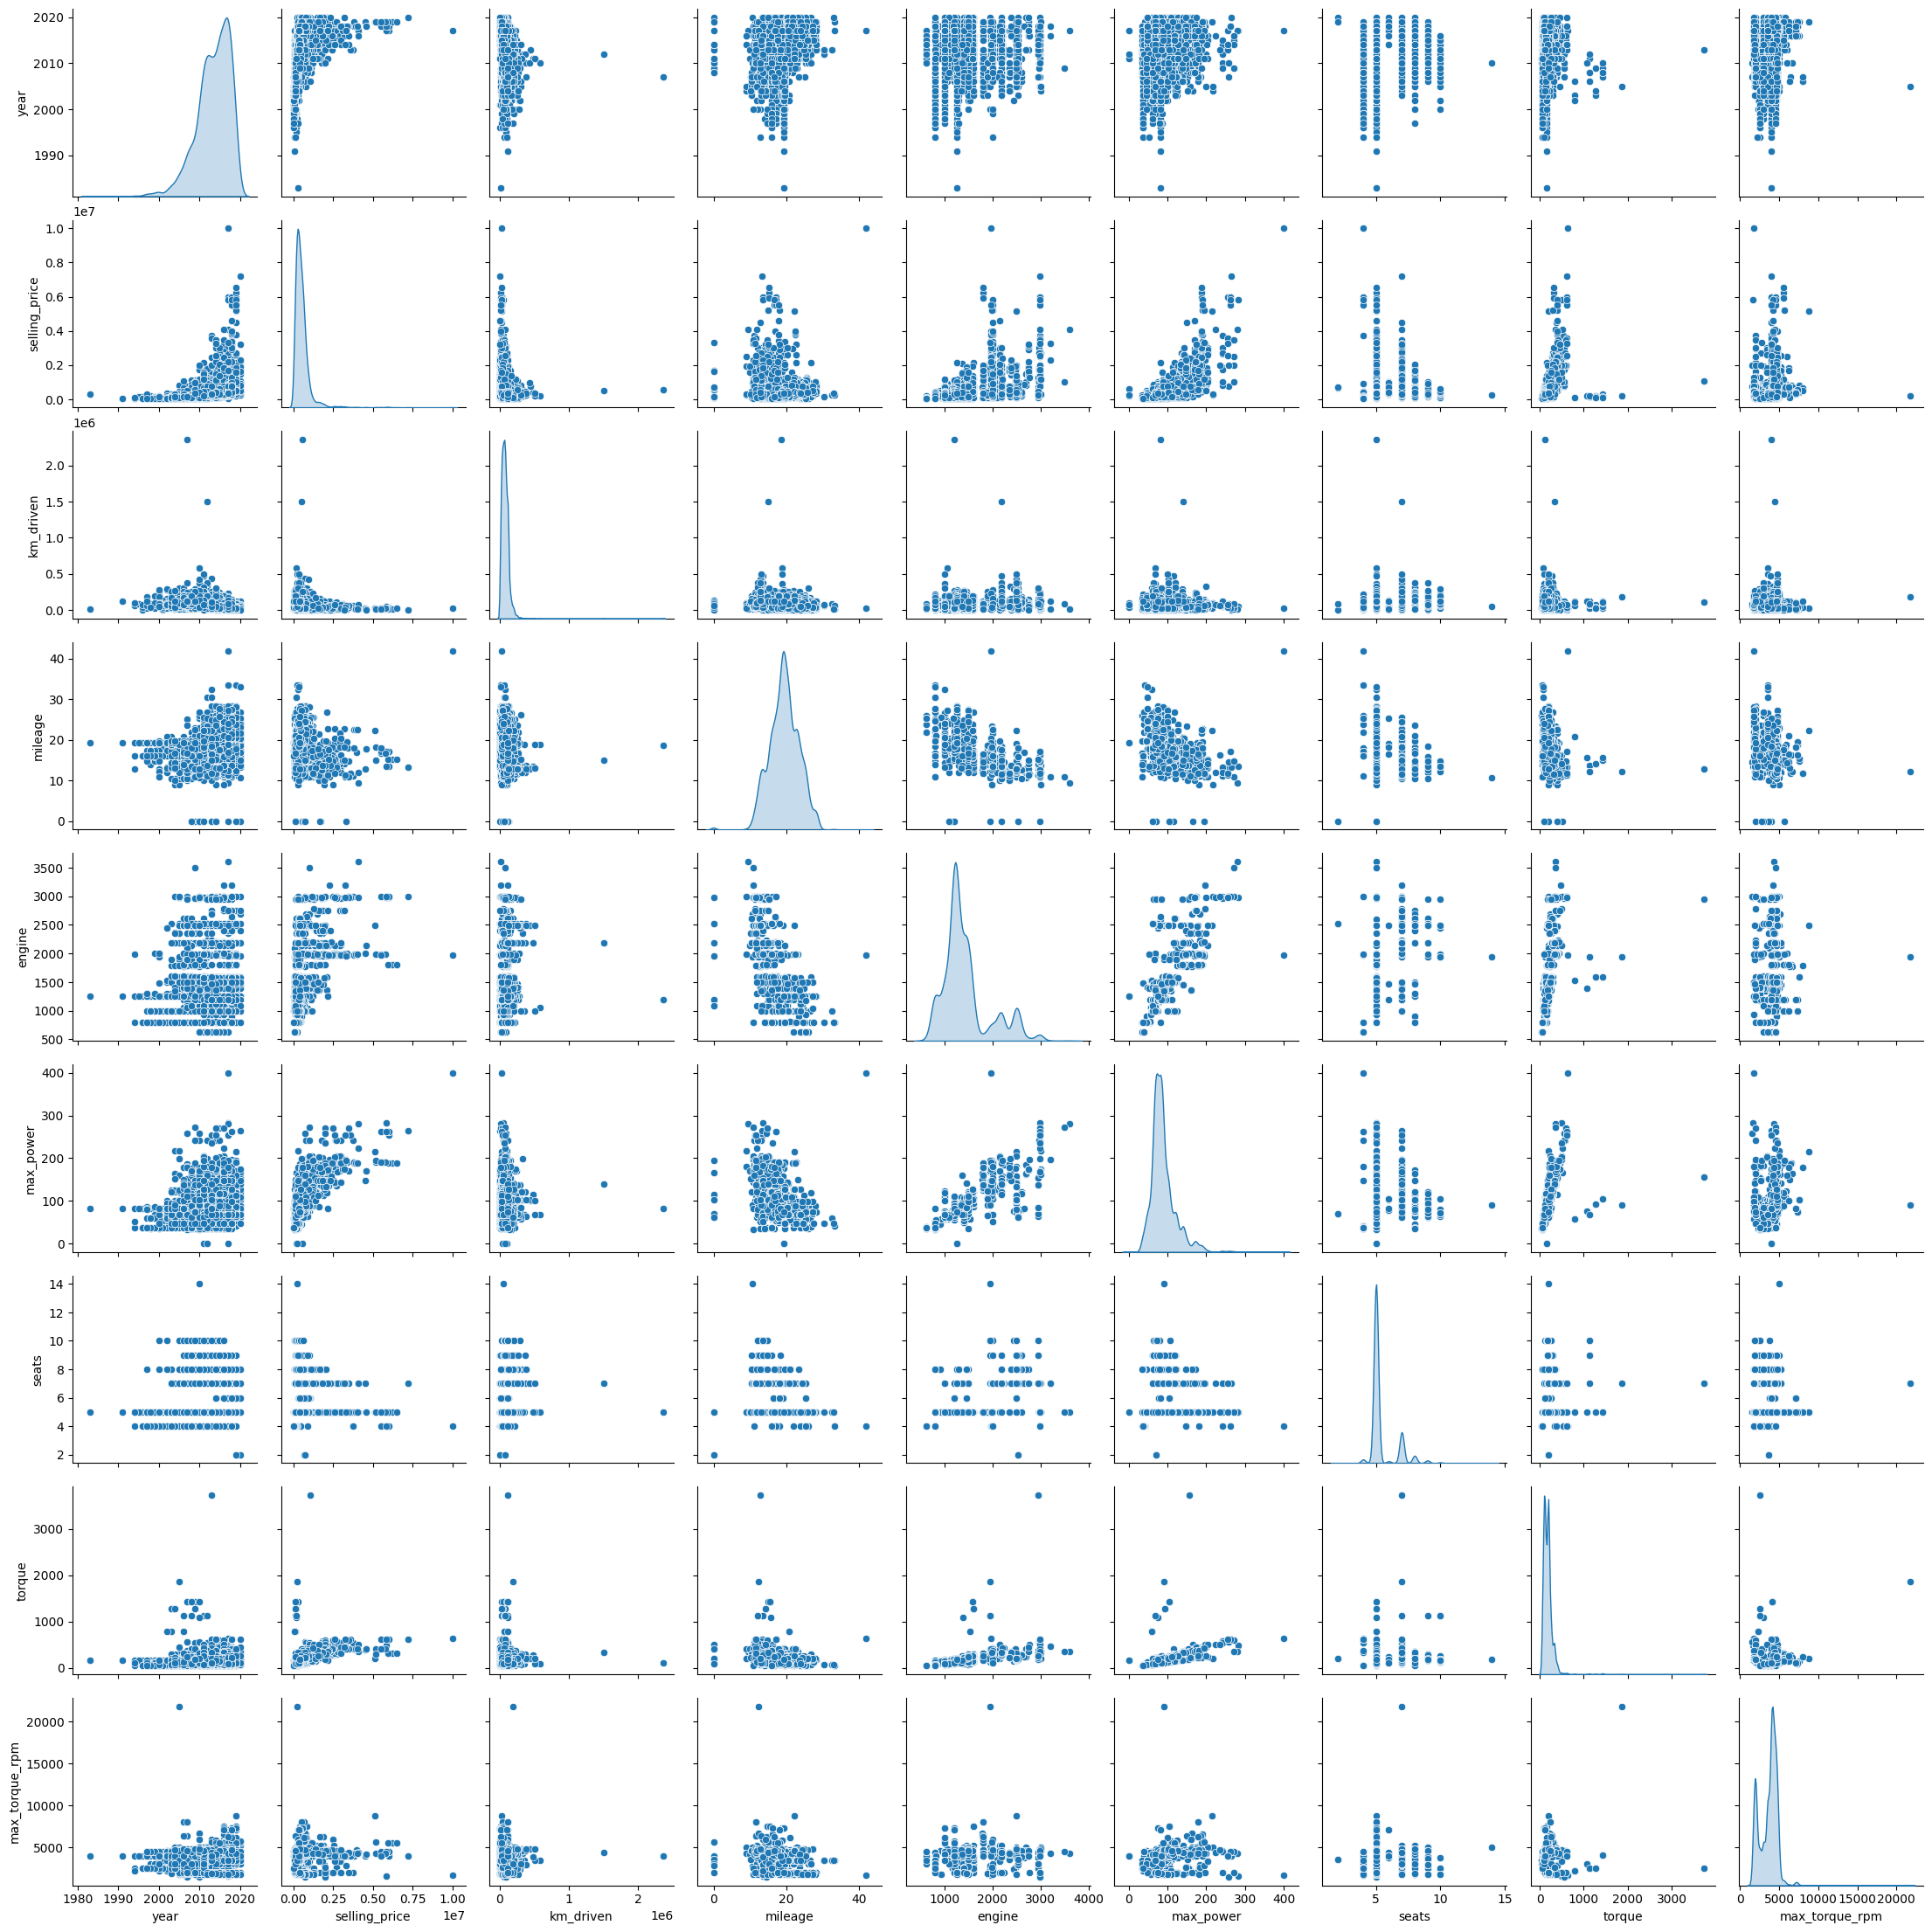

In [34]:
%matplotlib inline
sns.pairplot(df_train, diag_kind='kde')
#sns.set(fontsize=1.)

- Видим между следующими парами фичей что-то похожее на очень зашумленную прямую:`(engine, max_power), (max_power, torque)`, `(torque, engine)`
- Между `selling_price` и `year, torque` видим что-то похожее на на зашумленную экспоненциальную зависимость.

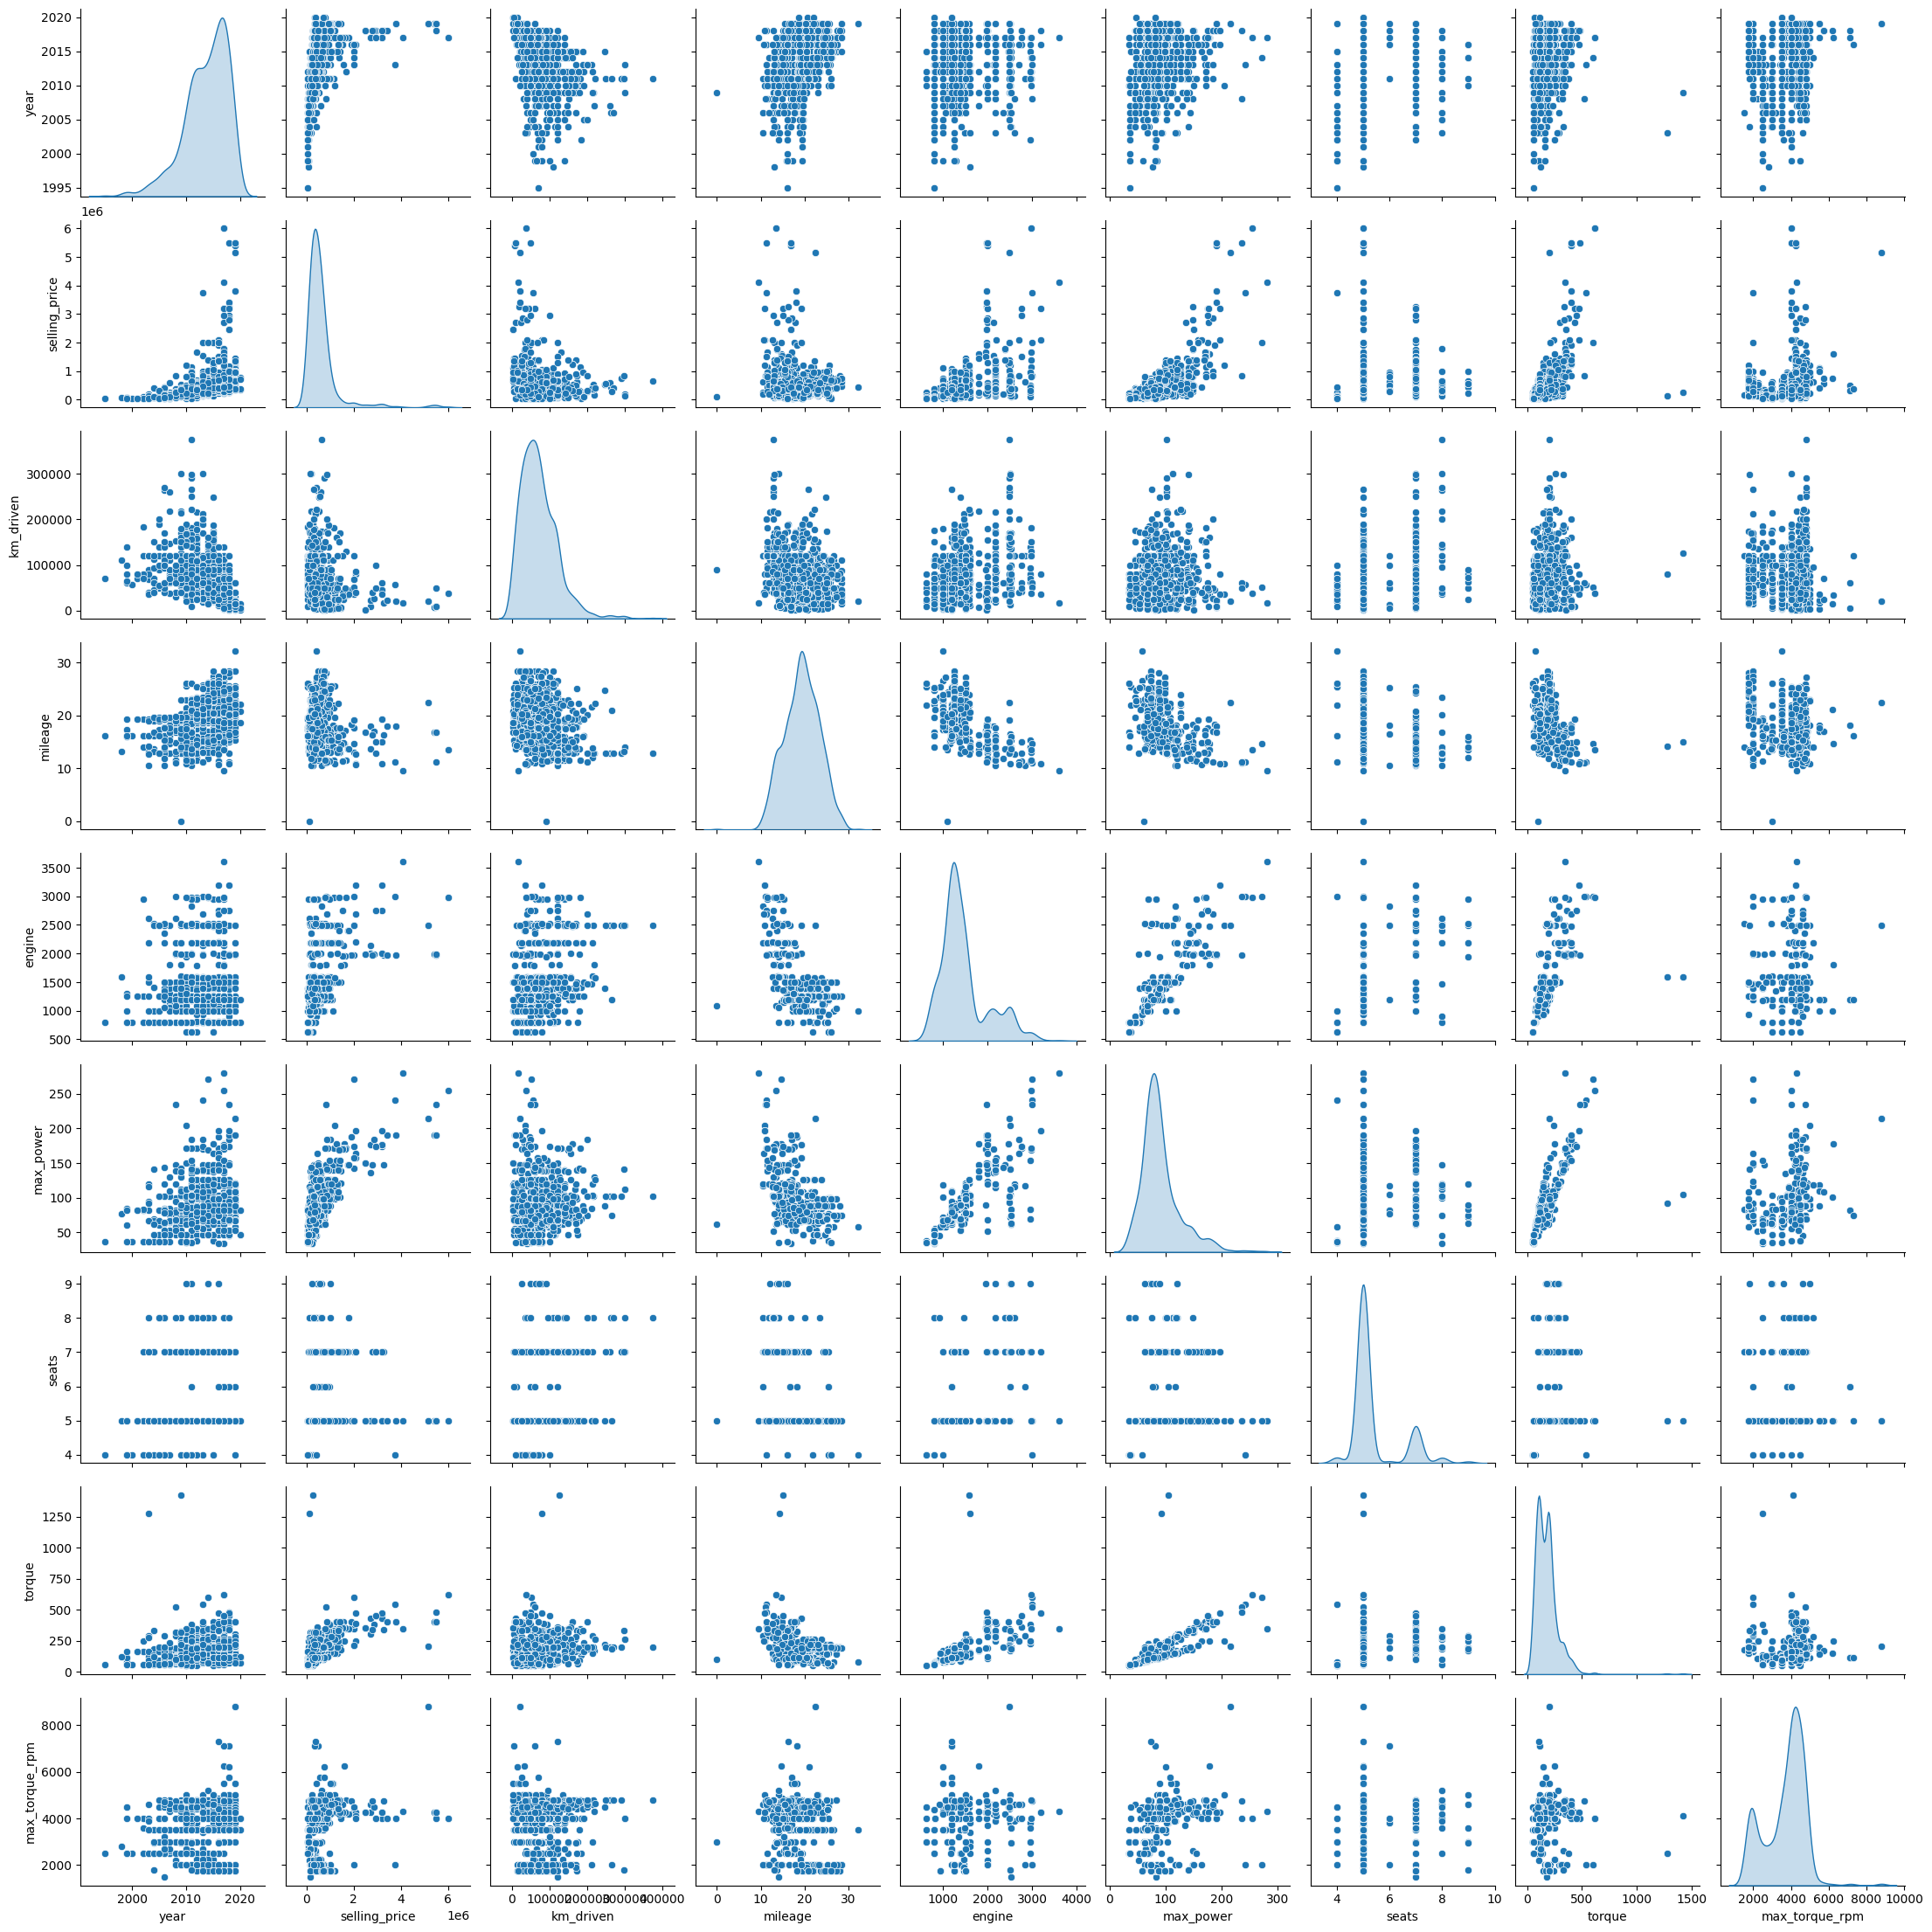

In [35]:
%matplotlib inline
sns.pairplot(df_test, diag_kind='kde')

Визуально видим, что графики для трейна и теста получились одинаковыми. К примеру, достаточно посмотреть на фигуры по диагонали двух картинок. Видим фигуры одинаковой формы, просто иногда немного растянутые в ширину. Аналогично, некоторые графики, где точки выстраиваются в полоски получились такими, что расстояние между полосками будто бы больше. Но при этом то, насколько соседние полоски длиннее/короче друг друга, все равно сохранилось -- опять же, выглядит как просто небольшое растяжение фигуры в рамках погрешности при сохранении самой формы распределения.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

**Решение.**

<Axes: >

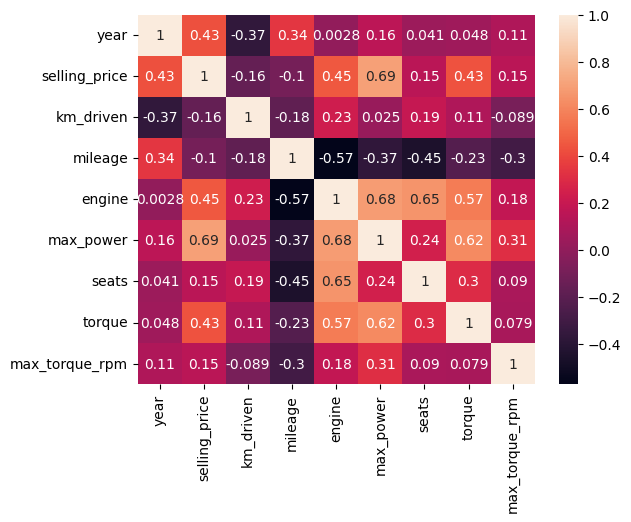

In [36]:
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответ.** 

Видим, что наименьшая корреляция у `(engine, mileage)`.

In [37]:
df_train.select_dtypes(include='number').corr() == np.abs(df_train.select_dtypes(include='number')).corr().min().min()

year  selling_price  km_driven  mileage  engine  max_power  \
year            False          False      False    False   False      False   
selling_price   False          False      False    False   False      False   
km_driven       False          False      False    False   False      False   
mileage         False          False      False    False    True      False   
engine          False          False      False     True   False      False   
max_power       False          False      False    False   False      False   
seats           False          False      False    False   False      False   
torque          False          False      False    False   False      False   
max_torque_rpm  False          False      False    False   False      False   

                seats  torque  max_torque_rpm  
year            False   False           False  
selling_price   False   False           False  
km_driven       False   False           False  
mileage         False   False           False  
engine          False   False           False  
max_power       False   False           False  
seats           False   False           False  
torque          False   False           False  
max_torque_rpm  False   False           False

Видим, что на `heatmap` для многих клеточек значение около 0.6. Посмотрим, для каикх оно больше 0.5:
- `(selling_price, max_power)`
- `(engine, max_power)`
- `(max_power, torque)`
- `(torque, engine)`
- `(seats, engine)`

In [38]:
df_train.select_dtypes(include='number').corr() > 0.5

year  selling_price  km_driven  mileage  engine  max_power  \
year             True          False      False    False   False      False   
selling_price   False           True      False    False   False       True   
km_driven       False          False       True    False   False      False   
mileage         False          False      False     True   False      False   
engine          False          False      False    False    True       True   
max_power       False           True      False    False    True       True   
seats           False          False      False    False    True      False   
torque          False          False      False    False    True       True   
max_torque_rpm  False          False      False    False   False      False   

                seats  torque  max_torque_rpm  
year            False   False           False  
selling_price   False   False           False  
km_driven       False   False           False  
mileage         False   False           False  
engine           True    True           False  
max_power       False    True           False  
seats            True   False           False  
torque          False    True           False  
max_torque_rpm  False   False            True

Третий вопрос -- так вполне возможно утверждать, так как корреляция слабая, но отрицательная, то есть, наблюдается незначительная обратная линейная зависимость.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


**Решение.** 

Посмотрим, как в `pandas` [реализована](https://github.com/pandas-dev/pandas/blob/v2.2.3/pandas/_libs/algos.pyx) функция `nancorr_spearman`. Ранги считаются через функцию `rank_1d`, которая определена в этом же файле. Попробуем воспроизвести ее в упрощенном виде:

In [39]:
def custom_rank_1d(arr):
    # Обработка нанов: работаем только с data[~data.isna()], а в остальных строчках оставляем наны вместо рангов
    # У нас наны уже были предварительно убраны, поэтому не реализую эту часть
    
    unique_arr, val_counts = np.unique(np.sort(arr), return_counts=True)
    mean_rank = 0.5 + np.cumsum(val_counts) - 0.5 * val_counts
    ranked_data = mean_rank[np.searchsorted(unique_arr, arr, side='left')]
    
    return ranked_data

Применим наши функции:

In [40]:
ranks_array = np.apply_along_axis(
    arr=df_train.select_dtypes(np.number).values,
    func1d=custom_rank_1d,  # наивный вариант рангов: lambda x : np.argsort(np.argsort(x)) + 1
    axis=0
)

custom_spearman = pd.DataFrame(
    np.corrcoef(ranks_array, rowvar=False), 
    columns=df_train.select_dtypes(np.number).columns,
    index=df_train.select_dtypes(np.number).columns
)

Проверим, что матрицы одинаковы:

In [41]:
np.abs(df_train.select_dtypes(np.number).corr(method='spearman') - custom_spearman).max().max() < 1e-7

True

Также можно реализовать Спирмена с помощью эвристики из Википедии:

```
def custom_spearman2(ranks_array):
    corr_mat = np.eye(ranks_array.shape[1])
    for i in range(ranks_array.shape[1]):
        for j in range(ranks_array.shape[1]):
            d = np.sum((ranks_array[:,i] - ranks_array[:,j]) ** 2)
            n = ranks_array.shape[0]
            corr_mat[i, j] = 1 - (6 * d / (n * (n * n -1)))

    return corr_mat
```

Теперь `phik`.

In [42]:
import phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']


/opt/homebrew/Caskroom/miniconda/base/envs/hw-venv/lib/python3.12/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


CPU times: user 483 ms, sys: 660 ms, total: 1.14 s
Wall time: 2.01 s


<Axes: >

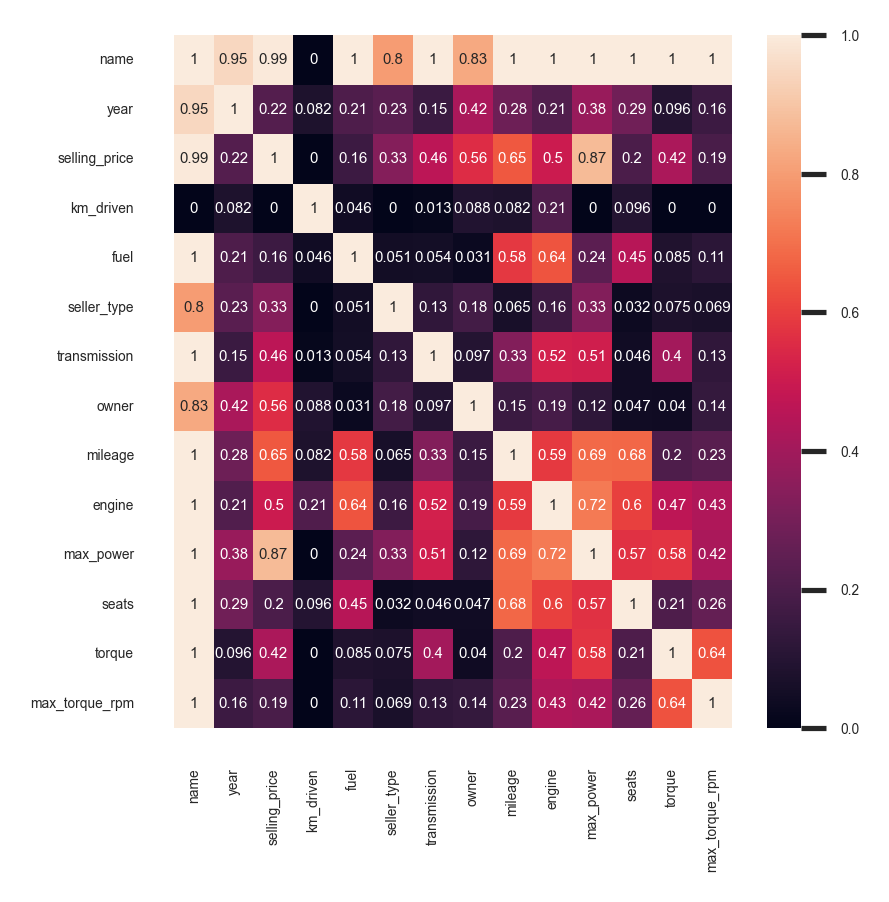

In [43]:
%%time
sns.set(font_scale=0.3)
plt.figure(figsize=(3, 3), dpi=300)
sns.heatmap(df_train.phik_matrix(), annot=True)

Видим несколько очевидных зависимостей. Например, между `name` и `year` -- ясно, что есть зависимость между названием модели и датой выпуска модели. Вдим коэффициент 0.42 для `(selling_price, torque)` -- зависимость, которая прослеживалась на `kdeplot`, действительно немного наблюдается. Видим также подтверждение наличие зависимости для `(engine, max_power), (max_power, torque), (torque, engine)`, которые видели на `kdeplot`. Особенно большой коэффициент получился для первой пары из этих трех. Видим также гигантскую зависимость `selling_price` от `max_power`, которая была не так очевидна по `kdeplot`. Также неплохой коэффициент получился для таргета и `transmission`, что было видно и из отчета в первом пункте.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Посмотрим на то, как зависит цена от года. Видим очевидно возрастающую зависимость, если проводить кривую через медианы, отображенные на "коробках" за каждый год. При этом мы видим выбросы существенно выше медианы, как и предполагалось.

<Axes: xlabel='year', ylabel='selling_price'>

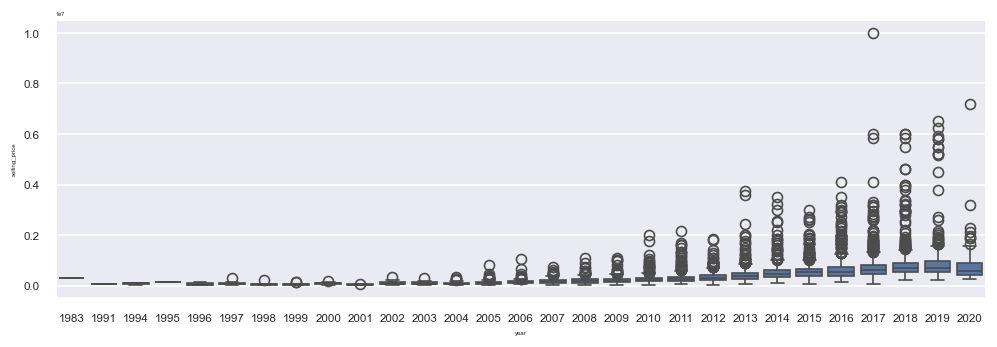

In [44]:
plt.figure(dpi=120, figsize=(10, 3))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
sns.boxplot(data=df_train, x='year', y='selling_price')

Логично убрать выбросы после того, как увидел их на `boxplot`. Посмотрим на зависимость `selling_price` от `year` теперь без выбросов.

In [45]:
df_train.year.loc[df_train.year > df_train.year.quantile(0.01)]

0       2014
1       2014
2       2010
3       2007
4       2017
        ... 
5835    2008
5836    2013
5837    2013
5838    2007
5839    2009
Name: year, Length: 5781, dtype: int64

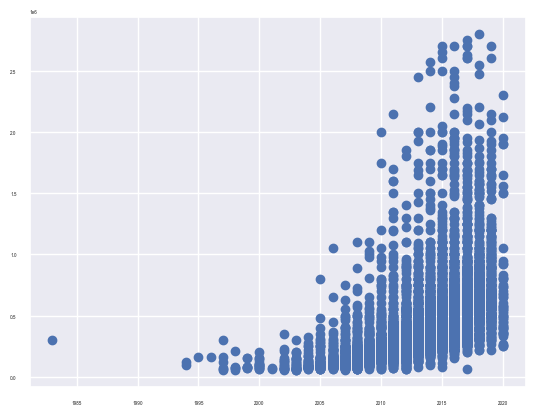

In [46]:
plt.scatter(
    df_train.year.loc[(df_train.selling_price > df_train.selling_price.quantile(0.01)) & (df_train.selling_price < df_train.selling_price.quantile(0.99))], 
    df_train.selling_price.loc[(df_train.selling_price > df_train.selling_price.quantile(0.01)) & (df_train.selling_price < df_train.selling_price.quantile(0.99))]
)

Все равно видно скорее зависимость "почти максимальной" цены от года:

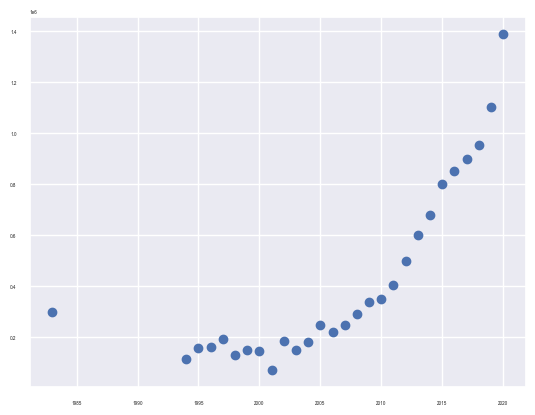

In [47]:
cur_df = df_train.loc[
(df_train.selling_price > df_train.selling_price.quantile(0.01)) & (df_train.selling_price < df_train.selling_price.quantile(0.99))
].groupby('year').selling_price.quantile(0.85)

plt.scatter(cur_df.index, cur_df.values)

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [48]:
df_numeric = df_train.select_dtypes(np.number).copy()

X_train = df_numeric.drop(columns='selling_price')
y_train = df_numeric.selling_price

In [49]:
# assert X_train.shape == (5840, 6)

In [50]:
df_numeric = df_test.select_dtypes(np.number).copy()

X_test = df_numeric.drop(columns='selling_price')
y_test = df_numeric.selling_price

In [51]:
# assert X_test.shape == (1000, 6)

Если мы считаем, что признаки либо вещественные, либо категорийные, то `engine` и `seats` тоже подходят все равно.

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(
    f'R2, train: {r2_score(y_train, lr.predict(X_train))}', 
    f'MSE, train: {MSE(y_train, lr.predict(X_train))}',
    f'R2, test: {r2_score(y_test, lr.predict(X_test))}', 
    f'MSE, test: {MSE(y_test, lr.predict(X_test))}',
    sep='\n'
)

R2, train: 0.5995956621480103
MSE, train: 114771234073.18416
R2, test: 0.5962030769224923
MSE, test: 232114002063.89178


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

**Решение.**

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$, где $SS_{res} = \sum (y - \hat{y})^2$, $SS_{tot} = \sum (y - \overline{y})^2$. То есть, $SS_{res}$ -- сумма квадратов остатков (чем меньше остатки => сумма их кваратов, тем лучше модель объясняет данные), $SS_{tot}$ -- дисперсия. Чем ближе сумма квадратов остатков к дисперсии, тем хуже модель описывает данные.

In [54]:
def myr2_score(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2) 

In [55]:
r2_score(y_test, lr.predict(X_test)) == myr2_score(y_test, lr.predict(X_test))

True

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

**Решение.**

Если в модели будет миллион фичей, $R^2$ будет неизбежно становиться все выше и выше. Чтобы сравнить вде модели с большим и маленьким количеством фичей объективно, надо использовать adjusted $R^2$ -- чтобы скорректировать этот недостаток $R^2$ (что она будет довольно высокой при достаточном кол-ве фичей)

In [56]:
def myr2_score_adjusted(y_true, y_pred, obj_cnt, features_cnt):
    return 1 - (1 - myr2_score(y_true, y_pred)) * (obj_cnt - features_cnt - 1) / (obj_cnt - 1)

myr2_score_adjusted(y_test, lr.predict(X_test), X_test.shape[0], X_test.shape[1])

0.599436685916106

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler().fit(X_train, y_train)

In [59]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(
    f'R2, train: {r2_score(y_train, lr.predict(X_train_scaled))}', 
    f'MSE, train: {MSE(y_train, lr.predict(X_train_scaled))}',
    f'R2, test: {r2_score(y_test, lr.predict(X_test_scaled))}', 
    f'MSE, test: {MSE(y_test, lr.predict(X_test_scaled))}',
    sep='\n'
)

R2, train: 0.59959566214801
MSE, train: 114771234073.18425
R2, test: 0.596203076922492
MSE, test: 232114002063.89194


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

**Решение.**

In [61]:
X_train.columns[np.argmax(np.abs(lr.coef_))]

'max_power'

Это как раз признак с наибольшей линейной корреляцией в матрице корреляций.

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [62]:
from sklearn.linear_model import Lasso

In [63]:
lr = Lasso()
lr.fit(X_train_scaled, y_train)
print(
    f'R2, train: {r2_score(y_train, lr.predict(X_train_scaled))}', 
    f'MSE, train: {MSE(y_train, lr.predict(X_train_scaled))}',
    f'R2, test: {r2_score(y_test, lr.predict(X_test_scaled))}', 
    f'MSE, test: {MSE(y_test, lr.predict(X_test_scaled))}',
    sep='\n'
)

R2, train: 0.599595662112401
MSE, train: 114771234083.39116
R2, test: 0.5962019547472974
MSE, test: 232114647122.23825


In [64]:
lr.coef_

array([162589.46550469, -46613.03812397,   7314.68417005,  46458.14594185,
       332007.08228942, -24332.62856876,  10940.48462515, -49287.86174694])

Квчество модели никак не изменилось по сравнению с моделью без регуляризации. Модель ничего не занулила, так как стандартный параметр регуляризации $\alpha = 0.1$ слишком маленький, чтобы регуляризация действительно зарабаотала как надо.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [65]:
from sklearn.model_selection import GridSearchCV

In [69]:
%%time

tuner = GridSearchCV(
    estimator=Lasso(),
    param_grid={
        'alpha': np.logspace(0, 5, 20)
    },
    scoring='neg_mean_squared_error',
    cv=10,
    return_train_score=True
).fit(X_train_scaled, y_train)

lr = tuner.best_estimator_.fit(X_train_scaled, y_train)

print(
    f'R2, train: {r2_score(y_train, lr.predict(X_train_scaled))}', 
    f'MSE, train: {MSE(y_train, lr.predict(X_train_scaled))}',
    f'R2, test: {r2_score(y_test, lr.predict(X_test_scaled))}', 
    f'MSE, test: {MSE(y_test, lr.predict(X_test_scaled))}',
    sep='\n'
)

R2, train: 0.5993281968106402
MSE, train: 114847899893.05624
R2, test: 0.5930489945683043
MSE, test: 233927058667.91437
CPU times: user 4.38 s, sys: 862 ms, total: 5.24 s
Wall time: 779 ms


На каждое значение гиперпараметра пришлось обучить 10 моделей (так как 10 фолдов). Ответ 200:

In [70]:
len(np.logspace(0, 5, 20)) * 10

200

Параметр `alpha` обозначает коэффициент $\alpha$ перед нормой весов.

In [71]:
tuner.best_params_

{'alpha': 2636.650898730358}

Видим, что занулились веса у `mileage` и `seats`:

In [72]:
pd.Series(
    data=tuner.best_estimator_.fit(X_train_scaled, y_train).coef_,
    index=X_train.columns.tolist()
)

year              161501.047586
km_driven         -43519.836599
mileage             3675.464037
engine             34692.368530
max_power         333788.865031
seats             -16707.023318
torque             10265.880001
max_torque_rpm    -46424.882712
dtype: float64

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [73]:
from sklearn.linear_model import ElasticNet

In [74]:
%%time

tuner = GridSearchCV(
    estimator=ElasticNet(),
    param_grid={
        'alpha': np.logspace(0, 5, 25),
        'l1_ratio': np.linspace(0.1, 1, 25)
    },
    scoring='neg_mean_squared_error',
    cv=10,
    return_train_score=True
).fit(X_train_scaled, y_train)

lr = tuner.best_estimator_.fit(X_train_scaled, y_train)
print(
    f'R2, train: {r2_score(y_train, lr.predict(X_train_scaled))}', 
    f'MSE, train: {MSE(y_train, lr.predict(X_train_scaled))}',
    f'R2, test: {r2_score(y_test, lr.predict(X_test_scaled))}', 
    f'MSE, test: {MSE(y_test, lr.predict(X_test_scaled))}',
    sep='\n'
)

R2, train: 0.5991294841970275
MSE, train: 114904858546.43294
R2, test: 0.5919831802894611
MSE, test: 234539719150.4007
CPU times: user 1min 44s, sys: 12.8 s, total: 1min 57s
Wall time: 16.3 s


Понадобилось 6250 моделей:

In [75]:
len(np.logspace(0, 5, 25)) * len(np.linspace(0.1, 1, 25)) * 10

6250

Вот такие гиперпараметры получились у лучшей модели:

In [76]:
tuner.best_params_

{'alpha': 3480.700588428413, 'l1_ratio': 1.0}

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



**Решение.**

Попробуем придумать наивный алгоритм.

_Обозначение 1._ Занумеруем множество $\{0, 1\}^n$. Будем обозначать через $a_i(k)$ $k$-ю координату $i$-го элемента множества $\{0, 1\}^n$.

_Обозначение 2._ Будем обозначать через $MSE(\beta)$ значение МНК-оценки, а через $L(\beta)$ -- значение функции потерь для набора весов $\beta$ из $H$, $R(\beta) := \lambda ||\beta||_0$. Обозначения $R_k := R|_{H_k}$, $L_k := L|_{H_k}$ должны подчеркнуть ситуацию, когда аргумент берется из подпространства $H_k \subset H$.

_Наблюдение 1._ Пусть $H = \{(\beta_1, \ldots, b_n) | \beta_j \in \mathbb{R})\}$ -- пространство всех возможных весов. Тогда разобьем его на непересекающиеся подпространства $H = H_1 \cup \ldots \cup H_{2^n}$ такие, что $H_i = \{(\beta_1, \ldots, \beta_n) \in H : \beta_j = 0 \Leftrightarrow a_i(j) = 0\}$. Тогда $L_k(\beta) = MSE(\beta) + R_k(\beta)$. Тогда условие минимальности $L_k(\beta^*) \leq L_k(\beta)$ $\forall \beta \in H_k$ раскрывается как $MSE(\beta^*) + R_k(\beta^*) \leq MSE(\beta) + R_k(\beta)$. Но $R_k(\beta') = R_k(\beta'')$ $\forall \beta', \beta'' \in H_k$ по определению (так как количество нулевых $\beta_j$ одинаково для всех $\beta \in H_k$). Тогда сокращаем $R_k$ с двух сторон неравенства и получаем, что $L_k(\beta^*) = \underset{\beta \in H_k}{\min} L_k(\beta) \Leftrightarrow MSE(\beta^*) = \underset{\beta \in H_k}{\min} MSE(\beta)$.

_Наблюдение 2._ Как нам теперь получить оптимум $MSE$ для $H_k$ явным образом? Мы можем просто убрать зануленные $\beta_j$ из рассмотрения. Рассмотрим для примера простой случай для $n = 4, a_k = (1, 1, 0, 0)$. Хотим найти $\beta^* \in H_k$ т. что $L(\beta^*) \leq L(\beta)$ $\forall \beta \in H_k$. Это значит, что $\frac{1}{\ell} \sum_{i=1}^\ell (\beta_1X_{i1} + \ldots + \beta_4X_{i4} - y_i)^2 \rightarrow \underset{\beta \in H_k}{\min}$. То есть, $\frac{1}{\ell} \sum_{i=1}^{\ell} (\beta_1X_{i1} + \beta_2X_{i2} + 0 \cdot X_{i3} + 0 \cdot X_{i4} - y_i)^2 \rightarrow \underset{\beta \in H_k}{\min}$. Следовательно, задача поиска минимума для $H_k$ эквивалентна $\frac{1}{\ell} \sum_{i=1}^{\ell} (\beta_1X_{i1} + \beta_2X_{i2} - y_i)^2 \rightarrow \underset{\beta \in \mathcal{B}}{\min}$, $\mathcal{B} = \{(\beta_1, \beta_2) | \beta_j \in \mathbb{R}\}$. Получается, что мы можем просто выкинуть 3 и 4 столбец из $X$ и найти минимум среди $\beta_1, \beta_2$ по МНК для регрессии уже на двух фичах вместо исходных четырех. И полученный таким образом минимум в $\mathcal{B}$ даст нам минимум в $H_k$, когда мы обратно добавим нолики в вектор $(\beta_1^*, \beta_2^*)$, получив из него $(\beta_1^*, \beta_2^*, 0, 0) \in H_k$.

В результате мы можем разбить наше пространство весов на конечное количество подпространств. В каждом из них найти минимум по МНК, убрав нулевые $\beta_j$. После этого просто перебором найти минимум среди найденных минимумов, так как ясно, что $\underset{\beta \in H}{\min} L(\beta) = \underset{k}{\min} \underset{\beta \in H_k}{\min} L_k(\beta)$

In [77]:
from itertools import product

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
from sklearn.linear_model import LinearRegression

Для простоты рассматриваем только случай с `fit_intercept=False`, когда результат `LinearRegression` полностью совпадает с `np.lstsq` и не включает в себя какие-либо дополнительные преоразования данных. Иначе можно просто заменить в коде `np.lstsq` на `sklearn.linear_model.LinearRegression` и просто делать $2^n$ `sklearn.linear_model.LinearRegression.fit`'ов внутри `NullRegression.fit(X, y)`.

In [80]:
class NullRegression:
    def __init__(self, l0_reg_param=1., fit_intercept=False):
        self.l0_reg_param = l0_reg_param
        self.fit_intercept = fit_intercept
        
        self.beta_ = None
        self.intercept_ = None

    def fit(self, X, y):
        coefs = dict()
        min_loss = +np.inf
        n = X.shape[1]

        for coefs_mask in list(product([0, 1], repeat=n))[1:]:
            zero_coefs = [i for i in range(n) if coefs_mask[i] == 0]
            nonzero_coefs = [i for i in range(n) if coefs_mask[i] != 0]
            nonzero_cnt = len(nonzero_coefs)

            # Отдельно обработаем случай, когда все коэффициенты равны нулю
            if len(nonzero_coefs) == 0:
                intercept_cur = np.array([0]) if not self.fit_intercept else intercept_nonzero
                betas_cur = np.zeros(n)
            
                y_pred = np.zeros(n)
                cur_loss = mean_squared_error(y, y_pred) + self.l0_reg_param * nonzero_cnt
            else:
                betas_cur = np.ones(n)  # Инициализация
                betas_cur[zero_coefs] = 0
                X_cur = X.iloc[:, nonzero_coefs]
    
                betas_nonzero, intercept_nonzero, _, _ = np.linalg.lstsq(X_cur, y, rcond=None)
                intercept_cur = np.array([0]) if not self.fit_intercept else intercept_nonzero 
                betas_cur[nonzero_coefs] = betas_nonzero
    
                y_pred = X @ betas_cur.T + intercept_cur
                cur_loss = mean_squared_error(y, y_pred) + self.l0_reg_param * nonzero_cnt
            
            if cur_loss < min_loss:
                self.intercept_, self.beta_ = intercept_cur[0], betas_cur
                min_loss = cur_loss
        
        return self

    def predict(self, X):
        return X @ self.beta_.T + self.intercept_

Проверяем корректность кода: $\lambda = 0 \Rightarrow$ результаты одинаковые.

In [81]:
reg = NullRegression(0)
reg.fit(
    df_train.select_dtypes(np.number).drop(columns='selling_price'), 
    df_train.selling_price
)

lr = LinearRegression(fit_intercept=False)
lr.fit(df_train.select_dtypes(np.number).drop(columns='selling_price'), df_train.selling_price)

(reg.beta_ == lr.coef_).all(), mean_squared_error(
    df_train.selling_price, 
    reg.predict(
        df_train.select_dtypes(np.number).drop(columns='selling_price')
    )
) == mean_squared_error(
    df_train.selling_price, 
    lr.predict(
        df_train.select_dtypes(np.number).drop(columns='selling_price')
    )
)

(True, True)

Посмотрим на количество зануленных коэффиицентах при разных значениях $\lambda$:

In [82]:
%%time

l0_grid = [
    100000, 
    50000000,
    100000000,
    400000000,
    10000000000,
    100000000000
]

for l0_param in l0_grid:
    reg = NullRegression(l0_param)
    reg.fit(
        pd.DataFrame(X_train_scaled, columns=X_train.columns.tolist()),
        y_train
    )
    print(l0_param, np.sum(reg.beta_ == 0))

100000 0
50000000 1
100000000 2
400000000 4
10000000000 6
100000000000 7
CPU times: user 11.1 s, sys: 1.03 s, total: 12.2 s
Wall time: 1.66 s


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

**Решение.**

In [83]:
def preprocess_categoric(df):
    df=df.copy()  # чтобы не изменить изначальный дф
    df['name'] = df.name.str.split().str.slice(0, 2).str.join(' ')
    return df

In [84]:
X_train_cat = preprocess_categoric(df_train).drop(columns=['selling_price'])

In [85]:
X_test_cat = preprocess_categoric(df_test).drop(columns=['selling_price'])

In [86]:
# assert X_train_cat.shape == (5840, 11)  # Опять почему-то два лишних столбца

In [87]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count           5840    5840        5840         5840         5840
unique           205       4           3            2            5
top     Maruti Swift  Diesel  Individual       Manual  First Owner
freq             558    3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

**Решение.**

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
categoric_cols = X_train_cat.select_dtypes('object').columns.tolist()

In [90]:
ohe = OneHotEncoder(drop='first', sparse_output=False).fit(pd.concat([X_train_cat, X_test_cat])[categoric_cols])

In [91]:
X_train_cat = pd.concat(
    [
        X_train_cat.drop(columns=categoric_cols), 
        pd.DataFrame(data=ohe.transform(X_train_cat[categoric_cols]), columns=ohe.get_feature_names_out())
    ], 
    axis=1
)

In [92]:
X_test_cat = pd.concat(
    [
        X_test_cat.drop(columns=categoric_cols), 
        pd.DataFrame(data=ohe.transform(X_test_cat[categoric_cols]), columns=ohe.get_feature_names_out())
    ], 
    axis=1
)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

**Решение.**

1. Лучше выставить `sparse_output=False`, чтобы вернуть данные в понатном формате и удалять одну категорию из $2^k$, где $k$ -- количество уникальных значений. Лучше не применять `OHE` к фичам с большим количеством категорий, так как количество колонок в итоговом датафрейме будет увеличиваться экспоненциально, что сильно ухудшит время обучения всех алгоритмов ML. Обучать `OHE` надо так, чтобы на тесте не вылезло категорий, которых не было на обучающей выборке.
2. Предположим, у нас два значения `a, b`. Ясно, что по `df[col] == a` можно сразу определить `df[col] == b` как `~(df[col] == a)`. Поэтому хранить сразу две колонки избыточно, можно хранить только одну. В общем случае `df[col] == a` определяется как `(df[col] != b) & (df[col] != c) & ...`.
3. Да. Для примера из NLP. Предположим мы закодировали `OHE` вхождения разных слов из словаря. Если какие-то слова не играют роли для предсказания, мы просто удаляем соответствующие колонки, и ничего страшного не произойдет.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [94]:
%%time

tuner = GridSearchCV(
    estimator=Ridge(),
    param_grid={
        'alpha': np.logspace(0, 5, 20)
    },
    scoring='r2',
    cv=10,
    return_train_score=True
).fit(X_train_cat, y_train)

lr = tuner.best_estimator_.fit(X_train_cat, y_train)
print(
    f'R2, train: {r2_score(y_train, lr.predict(X_train_cat))}', 
    f'MSE, train: {MSE(y_train, lr.predict(X_train_cat))}',
    f'R2, test: {r2_score(y_test, lr.predict(X_test_cat))}', 
    f'MSE, test: {MSE(y_test, lr.predict(X_test_cat))}',
    sep='\n'
)

R2, train: 0.868823749264847
MSE, train: 37600142542.74178
R2, test: 0.8838239341956788
MSE, test: 66781320106.05482
CPU times: user 4min 20s, sys: 14.4 s, total: 4min 34s
Wall time: 38.2 s


Да, удалось существенно. У `ElasticNet`, например, было `R2, test: 0.5196906107979353`. `MSE` тоже стало меньше.

In [95]:
myr2_score_adjusted(y_test, lr.predict(X_test_cat), X_test_cat.shape[0], X_test_cat.shape[1])

0.9102222994985626

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Для примера можно сгенерировать следующие фичи на основе графиков `kdeplot`:

In [ ]:
df_train['mileage * engine'] = df_train.mileage * df_train.engine

In [ ]:
df_train['year**2'] = df_train.year * df_train.year 

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    return np.mean(((y_pred / y_true) > 0.9) & ((y_pred / y_true) < 1.1))

models = [
    LinearRegression(), 
    Lasso(), 
    Ridge(),
    Lasso(alpha=16237.767), 
    ElasticNet(**{'alpha': 2.610157215682537, 'l1_ratio': 0.85})
]

for model in models:
    model.fit(X_train_cat, y_train)
    print(model, business_metrics(y_test, model.predict(X_test_cat)))

В итоге лучше всего почему-то решила обычная линейная регрессия без регуляризаций. Это логично в том числе потому что параметры регуляризации подбирались под другой датасет.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Рассмотрим более простую метрику: просто разница между тем, насколько модель завысила цену, и тем, насколько занизила (с весами $\alpha, \beta$). Если покупатель машин пользуется моделью для определения ее реальной стоимости, то метрика помогает определить, какая в среднем получится прибыль у продавца при использовании этой модели покупателем.

In [ ]:
def your_business_metrics(y_true, y_pred, alpha=1, beta=1):
    loss = y_pred[y_true < y_pred]
    gain = y_pred[y_true >= y_pred]

    total_loss = np.sum(y_pred[y_true < y_pred] - y_true[y_true < y_pred])
    total_gain = np.sum(y_true[y_true >= y_pred] - y_pred[y_true >= y_pred])
    
    return -alpha * total_loss + beta * total_gain
    
for model in models:
    model.fit(X_train_cat, y_train)
    print(model, your_business_metrics(y_test, model.predict(X_test_cat)))

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

TODO. Какие-то скриншоты обсуждались в чате ДЗ1 ??? `json -> dict -> df -> свели функцию для json к функции для df`

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>